In [1]:
import pandas as pd
import numpy as np
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

In [2]:
!ls ./sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [3]:
file_path = "/content/sample_data/naver_news.json"
with open(file_path, "r") as json_file:
    json_data = json.load(json_file)

<img src = "https://drive.google.com/uc?id=1g4ZENlobrTqWcStrmd4GMrz6ndokVaPd" height = 500 width = 500>

In [4]:
cnt = []
description = []
pDate = []
title = []

In [5]:
for i in range(len(json_data)):
    cnt.append(json_data[i]['cnt'])
    description.append(json_data[i]['description'])
    pDate.append(json_data[i]['pDate'])
    title.append(json_data[i]['title'])

In [6]:
df = pd.DataFrame({
    "cnt":cnt,
    "description":description,
    "date": pDate,
    "title": title
})

In [9]:
df3 = pd.read_csv('/content/sample_data/koreanair.csv')
df3.head()

,date,price
0,2022-04-01,31200
1,2022-04-04,31950
2,2022-04-05,32000
3,2022-04-06,32200


In [ ]:
df.head()

,cnt,description,date,title
0,1,"사이판, 괌, 하와이 등 인기 <b>해외여행</b>지로 향하는 한국 <b>여행</b...",2022-04-06 15:12:00,"사이판, 한국 관광객에 대한 PCR검사비 지원 연장"
1,2,이 중에서도 음식을 통해 <b>해외여행</b>에 대한 대리 만족을 느끼는 MZ세대의...,2022-04-06 15:08:00,'소스'의 변신은 무죄…이국적인 향신료·이색 소스 인기
2,3,"다만 아직은 내국인의 <b>해외여행</b> 중심으로 수요가 살아나는 상황이고, 면세...",2022-04-06 15:06:00,&quot;손님 다시 온다&quot; <b>여행</b>객 증가에 바빠진 면세점
3,4,또 고공행진을 이어온 국제유가에 유류비가 커지긴 했으나 ‘보복 <b>해외여행</b>...,2022-04-06 15:04:00,어닝시즌 시작에 실적전망 조정株 주목…‘고유가 수혜’ 최상위권
4,5,아울러 다시 살아나는 <b>해외 여행</b> 수요에 발맞춰 <b>여행</b> 전문 ...,2022-04-06 15:02:00,"CJ온스타일, 기획 프로그램 봄맞이 새 단장"


In [20]:
date_list = df['date'].values.tolist()

In [21]:
for i in range(len(date_list)):
    date_list[i]=date_list[i][5:10]
    df['date'][i] = date_list[i]
df['date'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    04-06
1    04-06
2    04-06
3    04-06
4    04-06
Name: date, dtype: object

In [22]:
news_counts = df['date'].value_counts()
news_counts

04-04    342
04-05    273
04-06    185
04-01     95
04-03     64
04-02     41
Name: date, dtype: int64

In [18]:
news_counts['04-04']

342

In [23]:
cnt_list = []
cnt_list.append(news_counts['04-01'])
cnt_list.append(news_counts['04-02'])
cnt_list.append(news_counts['04-03'])
cnt_list.append(news_counts['04-04'])
cnt_list.append(news_counts['04-05'])
cnt_list.append(news_counts['04-06'])
print(cnt_list)

[95, 41, 64, 342, 273, 185]


In [24]:
df2 = pd.DataFrame({
    "date": ['2022-04-01','2022-04-04','2022-04-05','2022-04-06'],
    "count":[cnt_list[0],cnt_list[3],cnt_list[4],cnt_list[5]]
    })
df2

,date,count
0,2022-04-01,95
1,2022-04-04,342
2,2022-04-05,273
3,2022-04-06,185


In [25]:
stock_date = np.array(df3['date'])
stock_price = np.array(df3['price'])
data_date = np.array(df2['date'])
data_count = np.array(df2['count'])

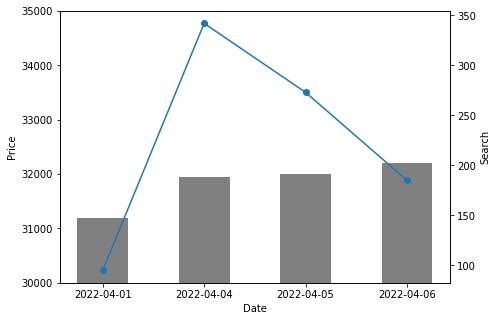

In [26]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.bar(stock_date,stock_price,width=0.5,color='grey')
ax2.plot(data_date,data_count,marker="o")

ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.set_ylim(30000,35000)
ax2.set_ylabel("Search")
plt.show()